In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [3]:
# import data 
df = pd.read_csv('/Users/arthurrastelli/Desktop/DS/Assignment/Assignment.csv')
df.head()

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEPH     163657 non-null  int64  
 1   CODPOSS   163657 non-null  int64  
 2   duree     163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nbrtotc   163657 non-null  int64  
 5   nbrtotan  163657 non-null  float64
 6   chargtot  163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sexp      163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 20.0+ MB
None


CHANGE THE CODPOSS VARIABLE INTO A CATEGORICAL VARIABLE

In [5]:
df['CODPOSS'] = df['CODPOSS'].astype('category')

FUNCTIONS FOR HISTOGRAMS, BARPLOTS and SCATTERPLOTS  (pay attention to the inputs)

In [6]:
def histogram(df, variable,binwidth, relative):
    if relative==False:
        return sns.histplot(data=df, x=variable,binwidth=binwidth, color = 'lightblue')
    elif relative ==True: 
        return sns.histplot(data=df, x=variable,binwidth=binwidth, stat='probability', color = 'lightblue')

In [7]:
def barplot(df, x, relative):
    frequency_counts = df[x].value_counts().reset_index()
    frequency_counts.columns = [x, 'absolute']
    frequency_counts['relative'] =frequency_counts['absolute'] / frequency_counts['absolute'].sum()

    if relative==False:
        return sns.barplot(data=frequency_counts, x=x,y='absolute', color = 'lightblue')
    elif relative==True:
        sns.barplot(data=frequency_counts, x=x,y='relative', color = 'lightblue')

In [8]:
def scattterplot(df, x, y):
    return sns.scatterplot(df, x, y)

FUNCTION FOR THE MINIMUM AND MAXIMUM VALUE

In [9]:
def minmax(df,x):
    return min(df[x]), max(df[x])

FUNCTION FOR TOTAL CLAIMS, EXPOSURE AND AMOUNTS PER CATEGORY OF THE VARIABLES

In [68]:
def aggregation(df,x):
    grouped = df.groupby(x).agg({
        'nbrtotc': 'sum',
        'duree': 'sum',        
        'chargtot': 'sum'})     
    grouped = grouped.rename(columns={
        'nbrtotc': 'Total Claims',
        'duree': 'Total Exposure',
        'chargtot': 'Claim Amount'})
    
    counts = pd.DataFrame(df[x].value_counts().reset_index())
    counts = counts.rename(columns={'index':x, x: 'absolute freq'})
    counts['relative freq'] = counts['absolute freq']/counts['absolute freq'].sum()

    return pd.merge(grouped,counts,on=x)

EXPLORING THE VARIABLES
- Change the variables in the functions (second argument)
- See what graph is the most interestin for the data type

1.1 AGEPH

Text(0, 0.5, 'frequency')

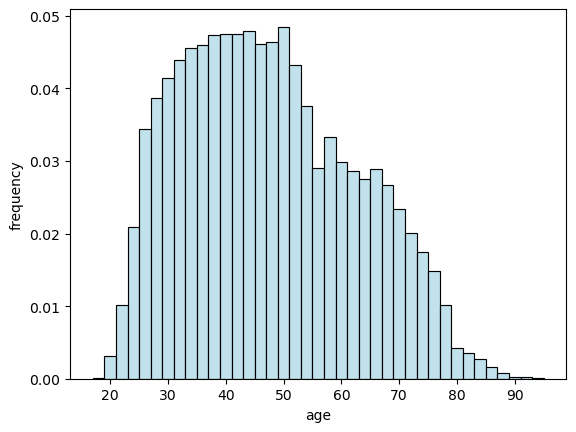

In [11]:
histogram(df, "AGEPH",binwidth=2,relative=True)
plt.xlabel('age')
plt.ylabel('frequency')

1.2 CODPOSS

In [ ]:
aggregation(df,'CODPOSS')
sorted_CODPOSS = aggregation(df,'CODPOSS').sort_values(by='Total Claims',ascending=False).reset_index()
sorted_CODPOSS

In [ ]:
top_CODPOSS = sorted_CODPOSS.head(5)
top_CODPOSS

1.3 CATEGORICAL VARIABLES

  agecar  Total Claims  Total Exposure  Claim Amount  absolute freq  \
0    0-1          1115     6570.191781  1.975692e+06           7766   
1    2-5          6029    46189.060274  8.671438e+06          51559   
2   6-10          8453    60555.106849  1.328777e+07          67151   
3    >10          4693    32305.369863  8.976585e+06          37181   

   relative freq  
0       0.047453  
1       0.315043  
2       0.410315  
3       0.227189  
     sexp  Total Claims  Total Exposure  Claim Amount  absolute freq  \
0  Female          5640    38001.589041  1.085424e+07          43223   
1    Male         14650   107618.139726  2.205724e+07         120434   

   relative freq  
0       0.264107  
1       0.735893  
    fuelc  Total Claims  Total Exposure  Claim Amount  absolute freq  \
0  Gasoil          7040    44613.397260  1.008824e+07          50447   
1  Petrol         13250   101006.331507  2.282324e+07         113210   

   relative freq  
0       0.308248  
1       0.691752  
 

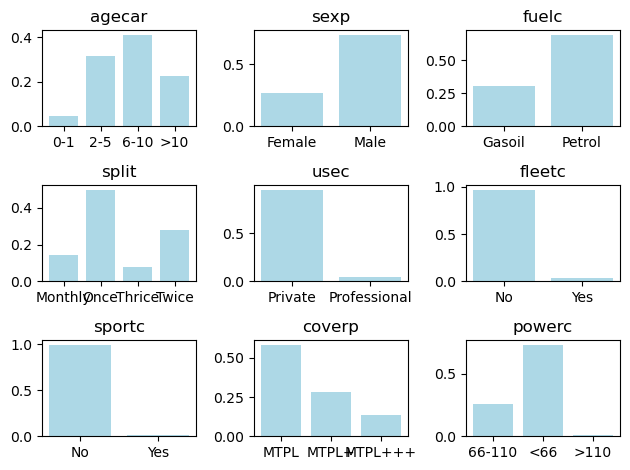

In [66]:
agecar = aggregation(df,'agecar')
print(agecar)
plt.subplot(3,3,1)
plt.bar(agecar['agecar'],agecar['relative freq'], color = 'lightblue')
plt.title('agecar')

sexp = aggregation(df,'sexp')
print(sexp)
plt.subplot(3,3,2)
plt.bar(sexp['sexp'],sexp['relative freq'], color = 'lightblue')
plt.title('sexp')

fuelc = aggregation(df,'fuelc')
print(fuelc)
plt.subplot(3,3,3)
plt.bar(fuelc['fuelc'],fuelc['relative freq'], color = 'lightblue')
plt.title('fuelc')

split = aggregation(df,'split')
print(split)
plt.subplot(3,3,4)
plt.bar(split['split'],split['relative freq'], color = 'lightblue')
plt.title('split')

usec = aggregation(df,'usec')
print(usec)
plt.subplot(3,3,5)
plt.bar(usec['usec'],usec['relative freq'], color = 'lightblue')
plt.title('usec')

fleetc = aggregation(df,'fleetc')
print(fleetc)
plt.subplot(3,3,6)
plt.bar(fleetc['fleetc'],fleetc['relative freq'], color = 'lightblue')
plt.title('fleetc')

sportc = aggregation(df,'sportc')
print(sportc)
plt.subplot(3,3,7)
plt.bar(sportc['sportc'],sportc['relative freq'], color = 'lightblue')
plt.title('sportc')

coverp = aggregation(df,'coverp')
print(coverp)
plt.subplot(3,3,8)
plt.bar(coverp['coverp'],coverp['relative freq'], color = 'lightblue')
plt.title('coverp')

powerc = aggregation(df,'powerc')
print(powerc)
plt.subplot(3,3,9)
plt.bar(powerc['powerc'],powerc['relative freq'], color = 'lightblue')
plt.title('powerc')

plt.tight_layout()
plt.show()

  agecar  Total Claims  Total Exposure  Claim Amount  absolute freq  \
0    0-1          1115     6570.191781  1.975692e+06           7766   
1    2-5          6029    46189.060274  8.671438e+06          51559   
2   6-10          8453    60555.106849  1.328777e+07          67151   
3    >10          4693    32305.369863  8.976585e+06          37181   

   relative freq  
0       0.047453  
1       0.315043  
2       0.410315  
3       0.227189  
     sexp  Total Claims  Total Exposure  Claim Amount  absolute freq  \
0  Female          5640    38001.589041  1.085424e+07          43223   
1    Male         14650   107618.139726  2.205724e+07         120434   

   relative freq  
0       0.264107  
1       0.735893  
    fuelc  Total Claims  Total Exposure  Claim Amount  absolute freq  \
0  Gasoil          7040    44613.397260  1.008824e+07          50447   
1  Petrol         13250   101006.331507  2.282324e+07         113210   

   relative freq  
0       0.308248  
1       0.691752  
 

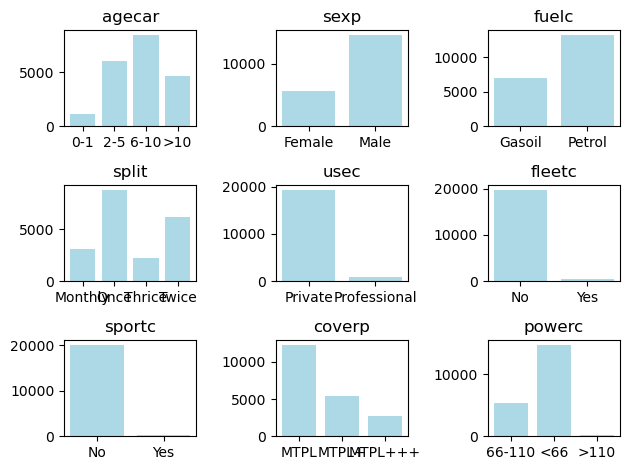

In [67]:
agecar = aggregation(df,'agecar')
print(agecar)
plt.subplot(3,3,1)
plt.bar(agecar['agecar'],agecar['Total Claims'], color = 'lightblue')
plt.title('agecar')

sexp = aggregation(df,'sexp')
print(sexp)
plt.subplot(3,3,2)
plt.bar(sexp['sexp'],sexp['Total Claims'], color = 'lightblue')
plt.title('sexp')

fuelc = aggregation(df,'fuelc')
print(fuelc)
plt.subplot(3,3,3)
plt.bar(fuelc['fuelc'],fuelc['Total Claims'], color = 'lightblue')
plt.title('fuelc')

split = aggregation(df,'split')
print(split)
plt.subplot(3,3,4)
plt.bar(split['split'],split['Total Claims'], color = 'lightblue')
plt.title('split')

usec = aggregation(df,'usec')
print(usec)
plt.subplot(3,3,5)
plt.bar(usec['usec'],usec['Total Claims'], color = 'lightblue')
plt.title('usec')

fleetc = aggregation(df,'fleetc')
print(fleetc)
plt.subplot(3,3,6)
plt.bar(fleetc['fleetc'],fleetc['Total Claims'], color = 'lightblue')
plt.title('fleetc')

sportc = aggregation(df,'sportc')
print(sportc)
plt.subplot(3,3,7)
plt.bar(sportc['sportc'],sportc['Total Claims'], color = 'lightblue')
plt.title('sportc')

coverp = aggregation(df,'coverp')
print(coverp)
plt.subplot(3,3,8)
plt.bar(coverp['coverp'],coverp['Total Claims'], color = 'lightblue')
plt.title('coverp')

powerc = aggregation(df,'powerc')
print(powerc)
plt.subplot(3,3,9)
plt.bar(powerc['powerc'],powerc['Total Claims'], color = 'lightblue')
plt.title('powerc')

plt.tight_layout()
plt.show()